# Process data cifar-10
#### Create folder data saving images for train, valid, and test

In [1]:
%%capture
!pip install wget
!pip install -U pandas

In [2]:
import json
import base64
import pandas as pd
import numpy as np
import wget
import ssl

import os
import tarfile
import shutil

import tqdm.notebook as tq

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Get cifar-10 tgz file
import wget
url='https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz'
save_name = 'cifar.tgz'
dest_dir='cifar10'
def get_cifar(url, save_name, dest_dir):
    wget.download(url, save_name)
    tf = tarfile.open(save_name)
    tf.extractall(dest_dir)

get_cifar(url, save_name, dest_dir)

100% [..................................................] 170498071 / 170498071

In [3]:
# Function reads pickle file
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [4]:
DIR='cifar10/cifar-10-batches-py/'
os.listdir(DIR)

['batches.meta',
 'data_batch_1',
 'data_batch_2',
 'data_batch_3',
 'data_batch_4',
 'data_batch_5',
 'readme.html',
 'test_batch']

In [5]:
fname = DIR+'data_batch_'
files = [fname+str(k+1) for k in range(5)]
train_dic = []
files
for name in files:
    train_dic.append(unpickle(name))
# len(train_dic)
test_dic = unpickle(DIR+'test_batch')
batch_dic = unpickle(DIR+'batches.meta')

In [6]:
print('batch_dic.keys(): ', batch_dic.keys(),'\n',
      '\ntest_dic.keys(): ', test_dic.keys(),'\n',
)
for k in range(len(train_dic)):
    print('train_dic[k].keys(): ',train_dic[k].keys(),'\n')

batch_dic.keys():  dict_keys([b'num_cases_per_batch', b'label_names', b'num_vis']) 
 
test_dic.keys():  dict_keys([b'batch_label', b'labels', b'data', b'filenames']) 

train_dic[k].keys():  dict_keys([b'batch_label', b'labels', b'data', b'filenames']) 

train_dic[k].keys():  dict_keys([b'batch_label', b'labels', b'data', b'filenames']) 

train_dic[k].keys():  dict_keys([b'batch_label', b'labels', b'data', b'filenames']) 

train_dic[k].keys():  dict_keys([b'batch_label', b'labels', b'data', b'filenames']) 

train_dic[k].keys():  dict_keys([b'batch_label', b'labels', b'data', b'filenames']) 



In [7]:
dt_train = train_dic[0][b'data']
print(dt_train.shape)
dt_train = pd.DataFrame(dt_train)
dt_train.head()

(10000, 3072)


,0,1,2,3,4,5,6,7,8,9,...,3062,3063,3064,3065,3066,3067,3068,3069,3070,3071
0,59,43,50,68,98,119,139,145,149,149,...,59,58,65,59,46,57,104,140,84,72
1,154,126,105,102,125,155,172,180,142,111,...,22,42,67,101,122,133,136,139,142,144
2,255,253,253,253,253,253,253,253,253,253,...,78,83,80,69,66,72,79,83,83,84
3,28,37,38,42,44,40,40,24,32,43,...,53,39,59,42,44,48,38,28,37,46
4,170,168,177,183,181,177,181,184,189,189,...,92,88,85,82,83,79,78,82,78,80


In [8]:
dt_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 3072 entries, 0 to 3071
dtypes: uint8(3072)
memory usage: 29.3 MB


In [11]:
# Get labels [0, 1, ...9]
dt_labels = train_dic[0][b'labels']
dt_labels = pd.DataFrame({'label': dt_labels})
print(type(dt_labels), len(dt_labels), dt_labels[:5])
dt_filenames = train_dic[0][b'filenames']
dt_filenames = [item.decode() for item in dt_filenames]
dt_labels['filename'] = dt_filenames
dt_labels.info()
dt_labels['label'].value_counts()
# dt_labels.columns
# dt_train.head()

<class 'pandas.core.frame.DataFrame'> 10000    label
0      6
1      9
2      9
3      4
4      1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   label     10000 non-null  int64 
 1   filename  10000 non-null  object
dtypes: int64(1), object(1)
memory usage: 156.4+ KB


2    1032
6    1030
8    1025
3    1016
0    1005
7    1001
4     999
9     981
1     974
5     937
Name: label, dtype: int64

In [12]:
# More info
dt_batch_label = train_dic[0][b'batch_label']
print(type(dt_batch_label))
dt_batch_label

<class 'bytes'>


b'training batch 1 of 5'

In [13]:
# keys = [b'batch_label', b'labels', b'data', b'filenames']
# Get dataframe from dictionary
def df_fr_dict(dict):
    '''
    dict: dictionary having data 'label', 'filename' and 'raw-image'
    '''
    dt_labels = dict[b'labels']
    # decode filename
    dt_filenames = [item.decode() for item in dict[b'filenames']]
    df = pd.DataFrame({'label': dt_labels,'filename': dt_filenames})
    dt_data = pd.DataFrame(dict[b'data'])
    df = pd.concat([df, dt_data], axis=1)   
    return df

# Test funcion df_fr_dict
tmp_df = df_fr_dict(train_dic[0])
tmp_df.info()
tmp_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 3074 entries, label to 3071
dtypes: int64(1), object(1), uint8(3072)
memory usage: 29.4+ MB


,label,filename,0,1,2,3,4,5,6,7,...,3062,3063,3064,3065,3066,3067,3068,3069,3070,3071
0,6,leptodactylus_pentadactylus_s_000004.png,59,43,50,68,98,119,139,145,...,59,58,65,59,46,57,104,140,84,72
1,9,camion_s_000148.png,154,126,105,102,125,155,172,180,...,22,42,67,101,122,133,136,139,142,144
2,9,tipper_truck_s_001250.png,255,253,253,253,253,253,253,253,...,78,83,80,69,66,72,79,83,83,84
3,4,american_elk_s_001521.png,28,37,38,42,44,40,40,24,...,53,39,59,42,44,48,38,28,37,46
4,1,station_wagon_s_000293.png,170,168,177,183,181,177,181,184,...,92,88,85,82,83,79,78,82,78,80


In [14]:
df = []
for k, dict in enumerate(train_dic): 
    df.append(df_fr_dict(train_dic[k]))
    print(df[k].shape)

df[0].head()

(10000, 3074)
(10000, 3074)
(10000, 3074)
(10000, 3074)
(10000, 3074)


,label,filename,0,1,2,3,4,5,6,7,...,3062,3063,3064,3065,3066,3067,3068,3069,3070,3071
0,6,leptodactylus_pentadactylus_s_000004.png,59,43,50,68,98,119,139,145,...,59,58,65,59,46,57,104,140,84,72
1,9,camion_s_000148.png,154,126,105,102,125,155,172,180,...,22,42,67,101,122,133,136,139,142,144
2,9,tipper_truck_s_001250.png,255,253,253,253,253,253,253,253,...,78,83,80,69,66,72,79,83,83,84
3,4,american_elk_s_001521.png,28,37,38,42,44,40,40,24,...,53,39,59,42,44,48,38,28,37,46
4,1,station_wagon_s_000293.png,170,168,177,183,181,177,181,184,...,92,88,85,82,83,79,78,82,78,80


In [15]:
# train: on ly 4 of 5 batches
train = df[0]
for k in range(1,4):
    train = pd.concat([train, df[k]])

print(train.info(), '---\n', train.shape)

valid =df[4]
print(valid.info(),'---\n', valid.shape)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40000 entries, 0 to 9999
Columns: 3074 entries, label to 3071
dtypes: int64(1), object(1), uint8(3072)
memory usage: 118.1+ MB
None ---
 (40000, 3074)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 3074 entries, label to 3071
dtypes: int64(1), object(1), uint8(3072)
memory usage: 29.4+ MB
None ---
 (10000, 3074)


In [16]:
print(valid['label'].value_counts(),'\n', 
      train['label'].value_counts())
print(valid.head(), '---\n',train.head())

5    1025
9    1022
3    1016
1    1014
0    1014
8    1003
4     997
6     980
7     977
2     952
Name: label, dtype: int64 
 2    4048
7    4023
6    4020
4    4003
8    3997
1    3986
0    3986
3    3984
9    3978
5    3975
Name: label, dtype: int64
   label                   filename    0    1    2    3    4    5    6    7  \
0      1   compact_car_s_001706.png  255  252  253  250  238  233  245  241   
1      8    icebreaker_s_001689.png  127  126  127  127  128  128  128  128   
2      5          peke_s_000545.png  116   64   19   29   36   40   57  143   
3      1   convertible_s_000520.png  205  213  235  232  112   98   95   80   
4      5  domestic_dog_s_000455.png  189  184  181  186  191  177  186  167   

   ...  3062  3063  3064  3065  3066  3067  3068  3069  3070  3071  
0  ...   254   253   253   252   252   231   172   173   231   248  
1  ...   108   103    97    95    88    81    89   102   108   112  
2  ...    59    32    17    10     9    10     8     7     6    

In [17]:
test = df_fr_dict(test_dic)
test.info()
# test.to_csv('test.csv', index=False)
print(test['label'].value_counts(),'---\n', test.shape, test.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 3074 entries, label to 3071
dtypes: int64(1), object(1), uint8(3072)
memory usage: 29.4+ MB
3    1000
8    1000
0    1000
6    1000
1    1000
9    1000
5    1000
7    1000
4    1000
2    1000
Name: label, dtype: int64 ---
 (10000, 3074)    label                   filename    0    1    2    3    4    5    6    7  \
0      3  domestic_cat_s_000907.png  158  159  165  166  160  156  162  159   
1      8     hydrofoil_s_000078.png  235  231  232  232  232  232  232  232   
2      8      sea_boat_s_001456.png  158  158  139  132  166  182  187  193   
3      0      jetliner_s_001705.png  155  167  176  190  177  166  168  166   
4      6    green_frog_s_001658.png   65   70   48   30   23   40   44   45   

   ...  3062  3063  3064  3065  3066  3067  3068  3069  3070  3071  
0  ...   130   123   145   167   182   175   145   124   129   110  
1  ...   108   117   123   133   141   153   163   178   191   199

In [17]:
# valid.reset_index(drop=True)
train = train.reset_index(drop=True)
train

,label,filename,0,1,2,3,4,5,6,7,...,3062,3063,3064,3065,3066,3067,3068,3069,3070,3071
0,6,leptodactylus_pentadactylus_s_000004.png,59,43,50,68,98,119,139,145,...,59,58,65,59,46,57,104,140,84,72
1,9,camion_s_000148.png,154,126,105,102,125,155,172,180,...,22,42,67,101,122,133,136,139,142,144
2,9,tipper_truck_s_001250.png,255,253,253,253,253,253,253,253,...,78,83,80,69,66,72,79,83,83,84
3,4,american_elk_s_001521.png,28,37,38,42,44,40,40,24,...,53,39,59,42,44,48,38,28,37,46
4,1,station_wagon_s_000293.png,170,168,177,183,181,177,181,184,...,92,88,85,82,83,79,78,82,78,80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,0,jumbojet_s_000561.png,229,231,232,232,233,233,233,233,...,89,88,84,78,81,106,151,174,181,190
39996,1,convertible_s_002000.png,68,59,53,46,52,60,60,64,...,65,64,64,64,63,62,64,66,66,67
39997,6,bufo_s_000370.png,167,164,151,161,190,156,156,172,...,84,70,59,61,80,115,130,132,142,130
39998,2,bird_s_001710.png,45,46,46,47,48,48,49,49,...,36,38,50,82,53,14,34,30,34,24


### Matrix 10000 rows, each row is a color image (3x32x32)

In [19]:
test_image_data = test.drop(columns=['label', 'filename'])
for col in test_image_data.columns:
    test_image_data[col] = test_image_data[col].astype('uint8')
    
test_image_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 3072 entries, 0 to 3071
dtypes: uint8(3072)
memory usage: 29.3 MB


3072
passenger_ship_s_000209.png


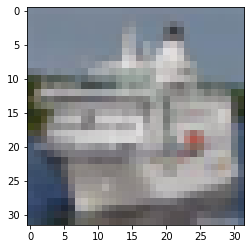

In [20]:
# Try 1 test image
import numpy as np
from random import randint
image_size = 32*32
image_resolution = (32,32)
# test_image_data = np.array(test_image_data)
# Get random row of test data
n = randint(0,test.shape[0]-1)
row = np.array(test.iloc[n][2:]).astype('uint8')
# row =test_image_data[n].astype('uint8')
# imgname = str(test['filename'][n])
imgname = str(test.iloc[n]['filename'])
print(len(row))
mat = list()
for k in range(3):
    mat.append(np.reshape(row[k*image_size:(k+1)*image_size], image_resolution))
# dstack need a tupple
image = np.dstack(tuple(mat))
# print(image)
plt.imsave(imgname, image)
plt.imshow(image)
print(imgname)

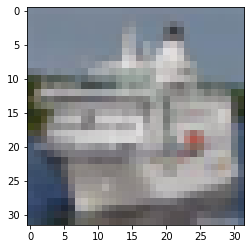

In [21]:
rimage = plt.imread(imgname)
plt.imshow(rimage)
plt.show()

In [22]:
df[0].info()
df[0].head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 3074 entries, label to 3071
dtypes: int64(1), object(1), uint8(3072)
memory usage: 29.4+ MB


,label,filename,0,1,2,3,4,5,6,7,...,3062,3063,3064,3065,3066,3067,3068,3069,3070,3071
0,6,leptodactylus_pentadactylus_s_000004.png,59,43,50,68,98,119,139,145,...,59,58,65,59,46,57,104,140,84,72
1,9,camion_s_000148.png,154,126,105,102,125,155,172,180,...,22,42,67,101,122,133,136,139,142,144
2,9,tipper_truck_s_001250.png,255,253,253,253,253,253,253,253,...,78,83,80,69,66,72,79,83,83,84
3,4,american_elk_s_001521.png,28,37,38,42,44,40,40,24,...,53,39,59,42,44,48,38,28,37,46
4,1,station_wagon_s_000293.png,170,168,177,183,181,177,181,184,...,92,88,85,82,83,79,78,82,78,80


In [23]:
# ! mkdir data

In [24]:
def write_images(df, dirname):
    fullnames_list = []
    image_size = 32*32
    image_resolution = (32,32)
    data = np.array(df.drop(columns=['label', 'filename']))
    # Create folder 
    # if os.path.isdir(dirname) == False:
    #     os.mkdir(dirname)
    os.makedirs(dirname, exist_ok = True)

    # create subfolder 0-> 9
    for j in range(10):
        newdir = dirname+'/'+str(j)
        # if os.path.isdir(newdir) == False:
        #     os.mkdir(newdir)
        os.makedirs(newdir, exist_ok = True)
    for n in range(df.shape[0]):
        row = data[n].astype('uint8')
        fullname = dirname + '/' + str(df['label'][n]) + '/' + str(df['filename'][n])
        fullnames_list.append(fullname)
        mat = list()
        for k in range(3):
            mat.append(np.reshape(row[k*image_size:(k+1)*image_size], image_resolution))
        
        image = np.dstack(tuple(mat))
        # write image file
        plt.imsave(os.path.normpath(fullname), image)
    # create new column 'fullname' for dataframe 
    tmp = pd.DataFrame({'fullname': fullnames_list})
    tmp = pd.concat([tmp, df], axis=1)
    return tmp
# test function
# tmp = write_images(df[0], 'data/train')


In [25]:
# Create folder data/valid and writes images and renew dataframe valid
valid = write_images(df[4], 'data/valid')
valid.info()
valid.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 3075 entries, fullname to 3071
dtypes: int64(1), object(2), uint8(3072)
memory usage: 29.5+ MB


,fullname,label,filename,0,1,2,3,4,5,6,...,3062,3063,3064,3065,3066,3067,3068,3069,3070,3071
0,data/valid/1/compact_car_s_001706.png,1,compact_car_s_001706.png,255,252,253,250,238,233,245,...,254,253,253,252,252,231,172,173,231,248
1,data/valid/8/icebreaker_s_001689.png,8,icebreaker_s_001689.png,127,126,127,127,128,128,128,...,108,103,97,95,88,81,89,102,108,112
2,data/valid/5/peke_s_000545.png,5,peke_s_000545.png,116,64,19,29,36,40,57,...,59,32,17,10,9,10,8,7,6,5
3,data/valid/1/convertible_s_000520.png,1,convertible_s_000520.png,205,213,235,232,112,98,95,...,25,23,25,25,26,23,23,24,25,23
4,data/valid/5/domestic_dog_s_000455.png,5,domestic_dog_s_000455.png,189,184,181,186,191,177,186,...,77,75,77,74,75,76,72,76,77,72


In [28]:
# Create folder data/train and writes images and renew dataframe train
# 

train = write_images(train, 'data/train')
train.info()
train.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40000 entries, 0 to 9999
Columns: 3075 entries, fullname to 3071
dtypes: int64(1), object(2), uint8(3072)
memory usage: 118.4+ MB


,fullname,label,filename,0,1,2,3,4,5,6,...,3062,3063,3064,3065,3066,3067,3068,3069,3070,3071
0,data/train/6/leptodactylus_pentadactylus_s_000...,6,leptodactylus_pentadactylus_s_000004.png,59,43,50,68,98,119,139,...,59,58,65,59,46,57,104,140,84,72
1,data/train/9/camion_s_000148.png,9,camion_s_000148.png,154,126,105,102,125,155,172,...,22,42,67,101,122,133,136,139,142,144
2,data/train/9/tipper_truck_s_001250.png,9,tipper_truck_s_001250.png,255,253,253,253,253,253,253,...,78,83,80,69,66,72,79,83,83,84
3,data/train/4/american_elk_s_001521.png,4,american_elk_s_001521.png,28,37,38,42,44,40,40,...,53,39,59,42,44,48,38,28,37,46
4,data/train/1/station_wagon_s_000293.png,1,station_wagon_s_000293.png,170,168,177,183,181,177,181,...,92,88,85,82,83,79,78,82,78,80


In [ ]:
# train = tmp_train
# train.info()

In [29]:
# Create folder data/test and writes images and renew dataframe test
test = write_images(test, 'data/test')
test.info()
test.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 3075 entries, fullname to 3071
dtypes: int64(1), object(2), uint8(3072)
memory usage: 29.5+ MB


,fullname,label,filename,0,1,2,3,4,5,6,...,3062,3063,3064,3065,3066,3067,3068,3069,3070,3071
0,data/test/3/domestic_cat_s_000907.png,3,domestic_cat_s_000907.png,158,159,165,166,160,156,162,...,130,123,145,167,182,175,145,124,129,110
1,data/test/8/hydrofoil_s_000078.png,8,hydrofoil_s_000078.png,235,231,232,232,232,232,232,...,108,117,123,133,141,153,163,178,191,199
2,data/test/8/sea_boat_s_001456.png,8,sea_boat_s_001456.png,158,158,139,132,166,182,187,...,45,46,44,44,43,52,37,8,3,7
3,data/test/0/jetliner_s_001705.png,0,jetliner_s_001705.png,155,167,176,190,177,166,168,...,52,55,70,103,105,72,53,50,52,50
4,data/test/6/green_frog_s_001658.png,6,green_frog_s_001658.png,65,70,48,30,23,40,44,...,102,127,156,139,131,130,147,136,146,117


In [35]:
# Save csv files for reuse later
test.to_csv('test.csv', index=False)
train.to_csv('train.csv', index=False)
valid.to_csv('valid.csv', index=False)

In [25]:
def check_files(dir):
    '''
    dir: directory for check filename lists 
    '''
#     name_list = dir + '_files' 
    name_list = []
    for dirname, _, filenames in os.walk(dir):
        for filename in filenames:
            name_list.append(os.path.join(dirname, filename))
    return name_list
for dir in ['data/train', 'data/valid', 'data/test']:
    print(dir,'\t', len(check_files(dir)))
# print(len(check_files('test')),'\n',(len(check_files('valid'))),'\n',
# len(check_files('train')))


data/train 	 40000
data/valid 	 10000
data/test 	 10000


#### Get class name

In [27]:
batch_dic = unpickle(DIR+'batches.meta')
batch_dic.keys()

dict_keys([b'num_cases_per_batch', b'label_names', b'num_vis'])

In [28]:
batch_dic[b'num_vis']

3072

In [29]:
batch_dic[b'label_names']

[b'airplane',
 b'automobile',
 b'bird',
 b'cat',
 b'deer',
 b'dog',
 b'frog',
 b'horse',
 b'ship',
 b'truck']

In [30]:
batch_dic[b'num_cases_per_batch']

10000

In [ ]:
class_id = []
class_name = []
for k, val in enumerate(batch_dic[b'label_names']):
    class_id.append(k)
    class_name.append(val.decode())
classes = pd.DataFrame({'class_id': class_id, 'class_name': class_name})
# Save class name to csv file
classes.to_csv('classes.csv', index=False)

### Next notebook for tuning and training